# **Importing of Libraries**

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.style.use("ggplot")
import seaborn as sns
sns.set()
import plotly.express as px

import nltk
nltk.download("punkt")
nltk.download("stopwords")
import re

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM
from keras.optimizers import Adam

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

from wordcloud import WordCloud
from collections import Counter

import pickle

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Collection of Data**

In [2]:
df = pd.read_csv("IMDB.csv")
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

# **Data Preprocessing**

In [3]:
df.describe()

review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

In [4]:
df.shape

(50000, 2)

In [5]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
df["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

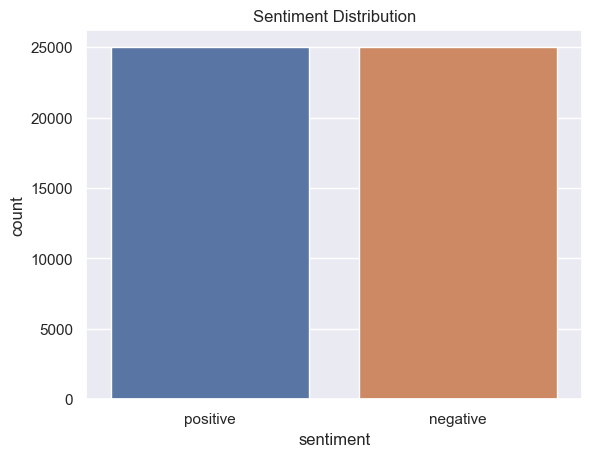

In [8]:
sns.countplot(x="sentiment", data=df)
plt.title("Sentiment Distribution")
plt.show()

In [9]:
positive = df.loc[df.sentiment=="positive"].review
positive

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
4        Petter Mattei's "Love in the Time of Money" is...
5        Probably my all-time favorite movie, a story o...
                               ...                        
49983    I loved it, having been a fan of the original ...
49985    Imaginary Heroes is clearly the best film of t...
49989    I got this one a few weeks ago and love it! It...
49992    John Garfield plays a Marine who is blinded by...
49995    I thought this movie did a down right good job...
Name: review, Length: 25000, dtype: object

In [10]:
negative = df.loc[df.sentiment=="negative"].review
negative

3        Basically there's a family where a little boy ...
7        This show was an amazing, fresh & innovative i...
8        Encouraged by the positive comments about this...
10       Phil the Alien is one of those quirky films wh...
11       I saw this movie when I was about 12 when it c...
                               ...                        
49994    This is your typical junk comedy.<br /><br />T...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 25000, dtype: object

In [11]:
for i in range(5):
    print("Review: ", [i])
    print(df["review"].iloc[i], "\n")
    print("Sentiment: ", df["sentiment"].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [12]:
text = df["review"][0]
print(text)
print("<=======>")
print(word_tokenize(text))

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [13]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [14]:
df["word count"] = df["review"].apply(no_of_words)
df.head()

review sentiment  word count
0  One of the other reviewers has mentioned that ...  positive         307
1  A wonderful little production. <br /><br />The...  positive         162
2  I thought this was a wonderful way to spend ti...  positive         166
3  Basically there's a family where a little boy ...  negative         138
4  Petter Mattei's "Love in the Time of Money" is...  positive         230

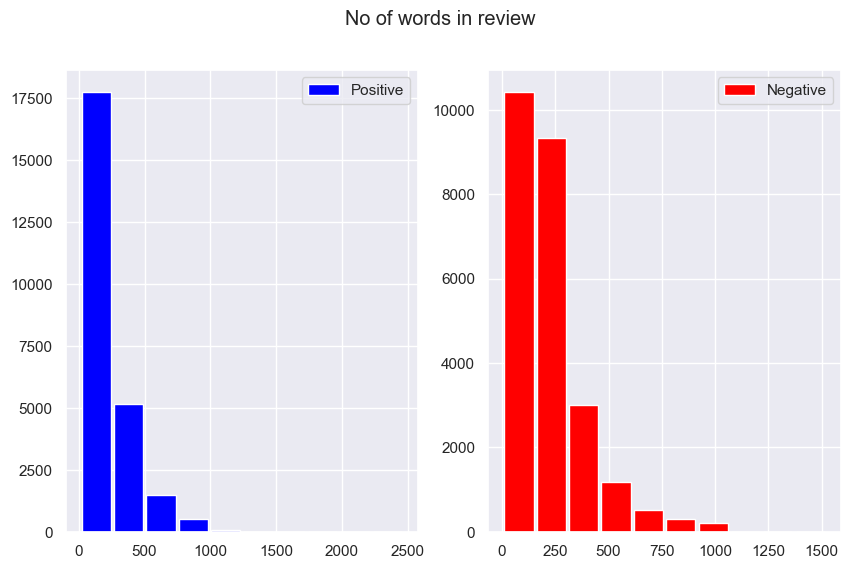

In [15]:
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].hist(df[df["sentiment"] == "positive"]["word count"], label = "Positive", color = "blue", rwidth = 0.9);
ax[0].legend(loc = "upper right");
ax[1].hist(df[df["sentiment"] == "negative"]["word count"], label = "Negative", color = "red", rwidth = 0.9);
ax[1].legend(loc = "upper right");
fig.suptitle("No of words in review")
plt.show()

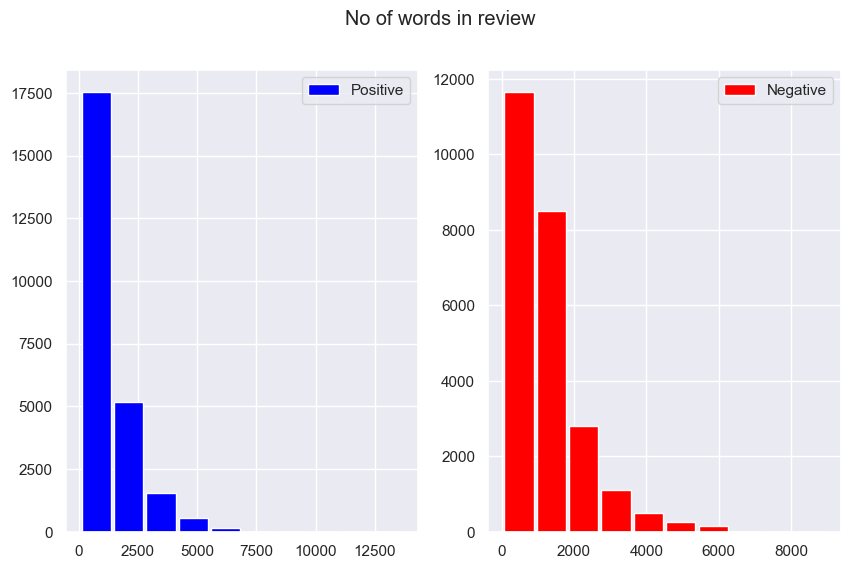

In [16]:
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].hist(df[df["sentiment"] == "positive"]["review"].str.len(), label = "Positive", color = "blue", rwidth = 0.9);
ax[0].legend(loc = "upper right");
ax[1].hist(df[df["sentiment"] == "negative"]["review"].str.len(), label = "Negative", color = "red", rwidth = 0.9);
ax[1].legend(loc = "upper right");
fig.suptitle("No of words in review")
plt.show()

In [17]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)

In [18]:
# This is to perform data cleaning
def data_processing(text):
    # Removing HTML strips, special characters, stop words, text stemming, square brackets and urls
    text = text.lower()
    text = re.sub("<br />","",text)
    text = re.sub(r"https\S+|www\S+|http\S+","",text,flags=re.MULTILINE)
    text = re.sub(r"\@w+|\#","",text)
    text = re.sub(r"[^\w\s]","",text)
    text_tokens = word_tokenize(text)
    # Here this stop_words is mentioned in importing of libraries
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

df.review = df["review"].apply(data_processing)

In [19]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [20]:
df.review = df["review"].apply(lambda x: stemming(x))
df["word count"] = df["review"].apply(no_of_words)
df.head()

review  sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...          1         168
1  wonderful little production filming technique ...          1          84
2  thought wonderful way spend time hot summer we...          1          86
3  basically theres family little boy jake thinks...          0          67
4  petter matteis love time money visually stunni...          1         125

In [21]:
text = df["review"][0]
print(text)
print("<=======>")
print(word_tokenize(text))

one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle c

In [22]:
duplicated_count = df.duplicated().sum()
print("Number of Duplicated Data: ", duplicated_count)

Number of Duplicated Data:  422


In [23]:
df = df.drop_duplicates("review")

In [24]:
df.shape

(49578, 3)

In [25]:
pos_reviews = df[df.sentiment == 1]
pos_reviews.head()

review  sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...          1         168
1  wonderful little production filming technique ...          1          84
2  thought wonderful way spend time hot summer we...          1          86
4  petter matteis love time money visually stunni...          1         125
5  probably alltime favorite movie story selfless...          1          58

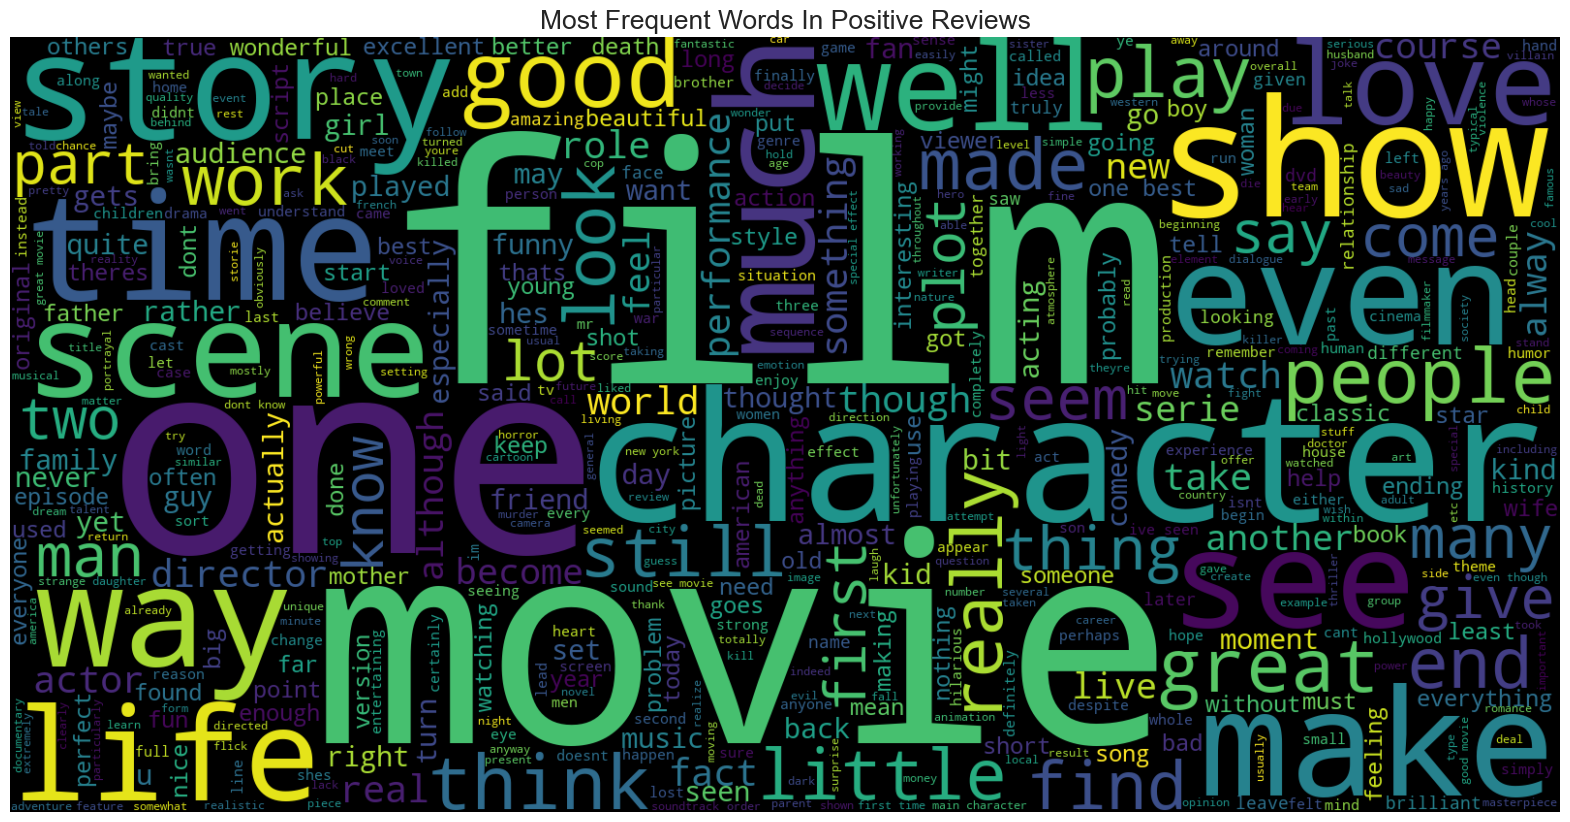

In [26]:
text = " ".join([word for word in pos_reviews["review"]])
plt.figure(figsize=(20,15), facecolor="None")
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words In Positive Reviews", fontsize=19)
plt.show()

In [27]:
count = Counter()
for text in pos_reviews["review"].values:
    for word in text.split():
        count[word]+=1
count.most_common(15)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

In [28]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ["word","count"]
pos_words.head()

word  count
0   film  39285
1  movie  35830
2    one  25621
3   like  16998
4   good  14281

In [29]:
px.bar(pos_words, x="count", y="word", title="Common Words In Positive Reviews", color = "word")

In [30]:
neg_reviews = df[df.sentiment == 0]
neg_reviews.head()

review  sentiment  word count
3   basically theres family little boy jake thinks...          0          67
7   show amazing fresh innovative idea 70s first a...          0          83
8   encouraged positive comments film looking forw...          0          64
10  phil alien one quirky films humour based aroun...          0          51
11  saw movie 12 came recall scariest scene big bi...          0          84

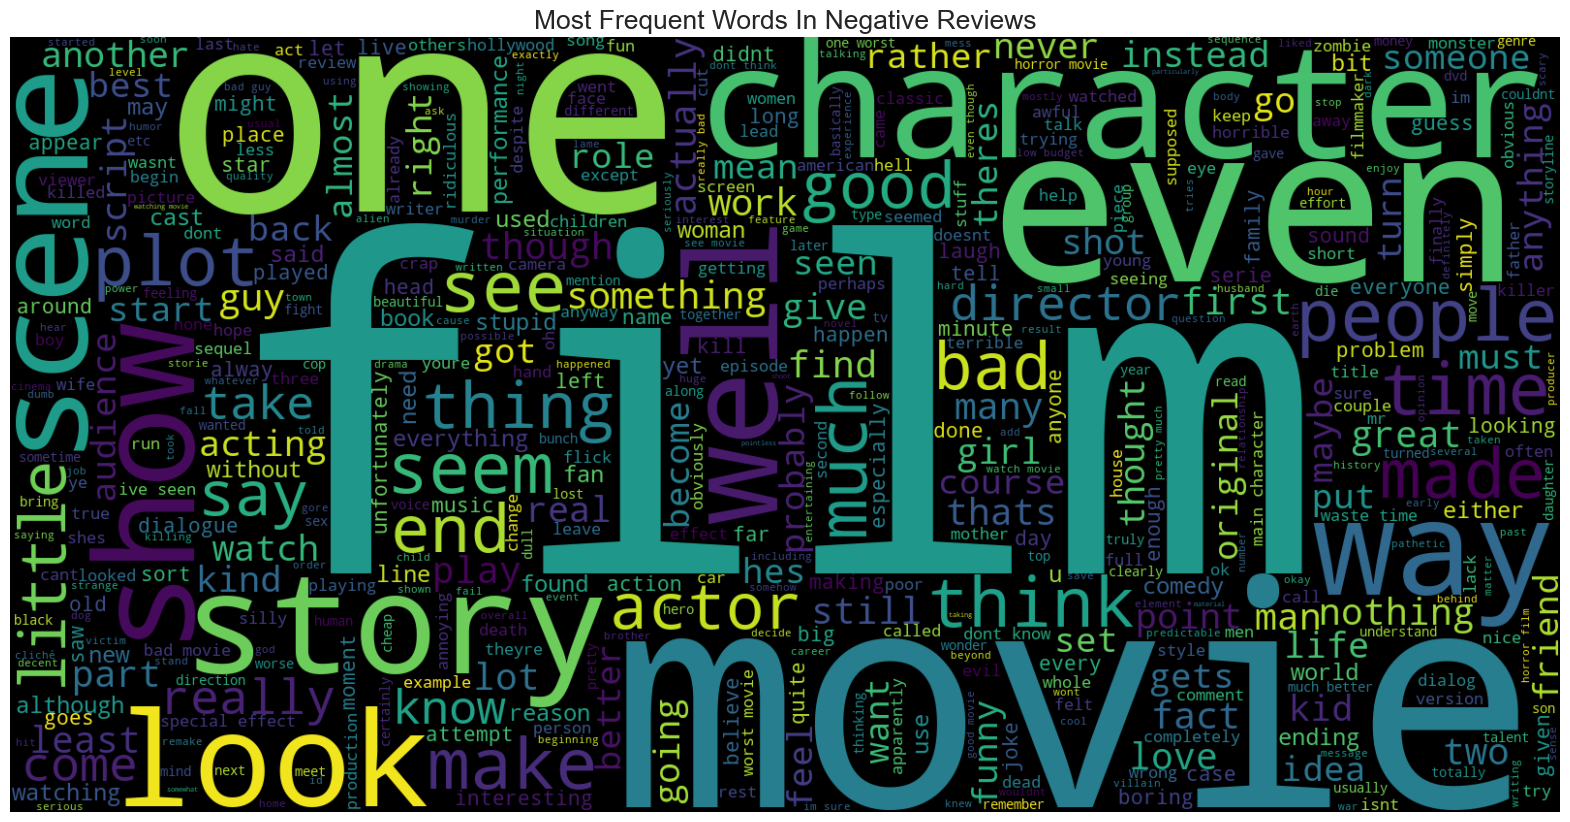

In [31]:
text = " ".join([word for word in neg_reviews["review"]])
plt.figure(figsize=(20,15), facecolor="None")
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words In Negative Reviews", fontsize=19)
plt.show()

In [32]:
count = Counter()
for text in neg_reviews["review"].values:
    for word in text.split():
        count[word]+=1
count.most_common(15)

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563)]

In [33]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ["word","count"]
neg_words.head()

word  count
0  movie  47001
1   film  34651
2    one  24361
3   like  21508
4   even  14759

In [34]:
px.bar(neg_words, x="count", y="word", title="Common Words In Negative Reviews", color = "word")

In [35]:
corpus = []
for text in df["review"]:
    words = [word.lower() for word in word_tokenize(text)]
    corpus.append(words)

In [36]:
num_words = len(corpus)
print(num_words)

49578


In [37]:
df.columns

Index(['review', 'sentiment', 'word count'], dtype='object')

# **Model Building**

In [38]:
X = df["review"]
y = df["sentiment"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit(X_train)

X_train_df = tfidf_vectorizer.transform(X_train)
X_test_df = tfidf_vectorizer.transform(X_test)

In [41]:
print("X Train shape:",X_train_df.shape)
print("X Test shape:",X_test_df.shape)
print("Y Train shape:",y_train.shape)
print("Y Test shape:",y_test.shape)

X Train shape: (39662, 192387)
X Test shape: (9916, 192387)
Y Train shape: (39662,)
Y Test shape: (9916,)


In [42]:
# Its bcoz we cannot change into array with that much quantities... so we reduced it to 2000
X_train = X_train_df[:2000]
X_test = X_test_df[:500]
y_train = y_train[:2000]
y_test = y_test[:500]

In [43]:
print("X Train shape:",X_train.shape)
print("X Test shape:",X_test.shape)
print("Y Train shape:",y_train.shape)
print("Y Test shape:",y_test.shape)

X Train shape: (2000, 192387)
X Test shape: (500, 192387)
Y Train shape: (2000,)
Y Test shape: (500,)


In [44]:
print(type(X_train)) 
print(type(X_test))

<class 'scipy.sparse._csr.csr_matrix'>
<class 'scipy.sparse._csr.csr_matrix'>


In [45]:
# After splitting your dataset into training and testing sets, you need to convert the text data into a format that can 
# be understood by the machine learning algorithms.This often involves converting the text into numerical representations 
# using techniques like Bag-of-Words, TF-IDF, word embeddings (e.g., Word2Vec, GloVe), or other methods.
# Here we used TF IDF 
X_train = X_train.toarray()
X_test = X_test.toarray()

In [46]:
def get_test_report(model):
    return(classification_report(y_test,y_pred))

In [47]:
def kappa_score(model):
    return(cohen_kappa_score(y_test,y_pred))

In [48]:
def plot_confusion_matrix(model):
   
    cm=confusion_matrix(y_test,y_pred)
    #Below codes all are just to beautify... above one is the main code for confusion matrix
    conf_matrix=pd.DataFrame(data=cm, columns=["Predicted 0","Predicted 1"], index=["Actual 0","Actual 1"])
    
    sns.heatmap(conf_matrix, annot=True,fmt="d", cmap=ListedColormap(["Lightskyblue"]),
               cbar=False, linewidths=0.1, annot_kws={"size":25})
    
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    plt.show()

In [49]:
def plot_roc(model):
    fpr, tpr, _ =roc_curve(y_test,y_pred) #underscore is used when it is not much of use
    
    plt.plot(fpr,tpr)
    
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    
    plt.plot([0,1],[0,1],"r--")
    
    plt.title("Roc Curve", fontsize=15)
    plt.xlabel("False positivity rate (1-specificity)", fontsize=15)
    plt.ylabel("True positivity rate (sensitivity)", fontsize=15)
    
    plt.text(x=0.02, y=0.9, s=("AUC Score:",round(roc_auc_score(y_test,y_pred),4)))
    
    plt.grid(True)

In [50]:
score_card=pd.DataFrame(columns=["Model","AUC Score","Precision Score","Recall Score","Accuracy Score",
                                "Kappa Score","F1 Score"])

def update_score_card(model_name):
    
    global score_card
    
    score_card = score_card._append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'F1 Score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    
    return(score_card)

**Logistic Regression**

In [51]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

In [52]:
test_report = get_test_report(log_reg)

print(test_report)

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       258
           1       0.79      0.87      0.83       242

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



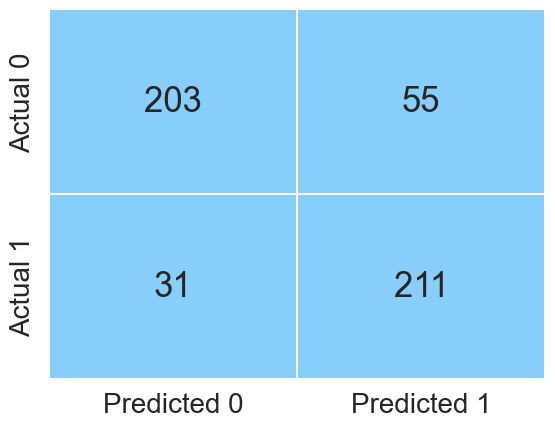

In [53]:
plot_confusion_matrix(log_reg)

In [54]:
kappa_value = kappa_score(log_reg)

print(kappa_value)

0.6567030721083222


In [55]:
F1_score = metrics.f1_score(y_pred, y_test)
print(F1_score)

0.8307086614173228


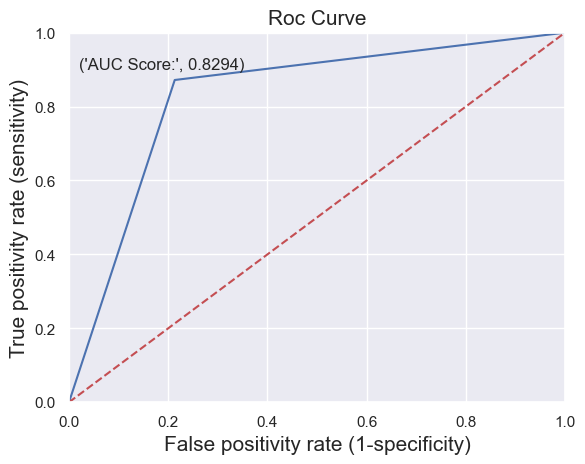

In [56]:
plot_roc(log_reg)

In [57]:
update_score_card(model_name = 'Logistic Regression')

Model  AUC Score  Precision Score  Recall Score  \
0  Logistic Regression   0.829361         0.793233      0.871901   

   Accuracy Score  Kappa Score  F1 Score  
0           0.828     0.656703  0.830709

**SGD Classifier**

In [58]:
SGD = SGDClassifier(loss = 'log_loss', random_state = 10)

logreg_with_SGD = SGD.fit(X_train, y_train)

logreg_with_SGD 

SGDClassifier(loss='log_loss', random_state=10)

In [59]:
y_pred_prob = logreg_with_SGD.predict_proba(X_test)[:,1]

In [60]:
y_pred = logreg_with_SGD.predict(X_test)

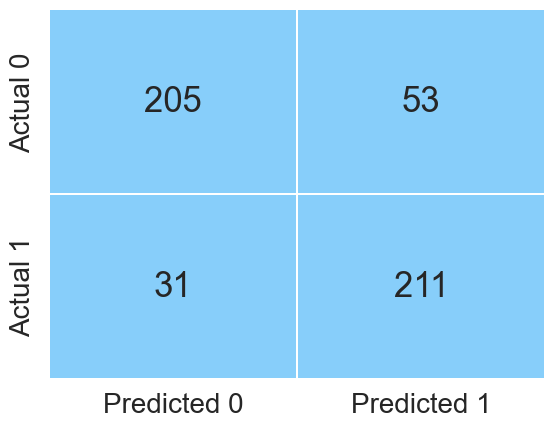

In [61]:
plot_confusion_matrix(logreg_with_SGD)

In [62]:
test_report = get_test_report(logreg_with_SGD)

print(test_report)

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       258
           1       0.80      0.87      0.83       242

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.84      0.83      0.83       500



In [63]:
kappa_value = kappa_score(logreg_with_SGD)

print(kappa_value)

0.6646010349453779


In [64]:
F1_score = metrics.f1_score(y_pred, y_test)
print(F1_score)

0.83399209486166


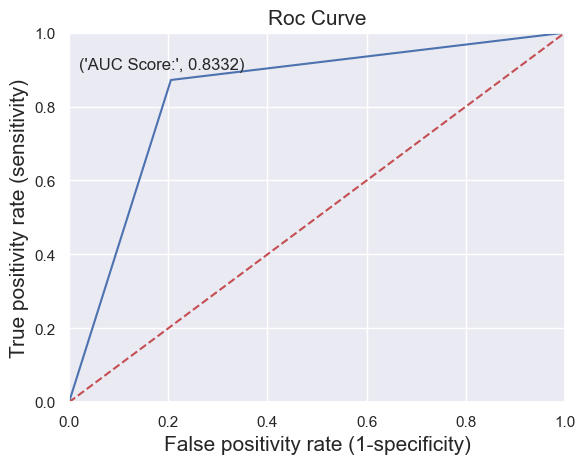

In [65]:
plot_roc(logreg_with_SGD)

In [66]:
update_score_card(model_name = 'Logistic Regression (SGD)')

Model  AUC Score  Precision Score  Recall Score  \
0        Logistic Regression   0.829361         0.793233      0.871901   
1  Logistic Regression (SGD)   0.833237         0.799242      0.871901   

   Accuracy Score  Kappa Score  F1 Score  
0           0.828     0.656703  0.830709  
1           0.832     0.664601  0.833992

**Decision Tree**

In [67]:
decision_tree  = DecisionTreeClassifier(criterion= "entropy", random_state=10)

decision_tree_model = decision_tree.fit(X_train, y_train)

In [68]:
y_pred_prob = decision_tree_model.predict_proba(X_test)[:,1]

In [69]:
y_pred = decision_tree_model.predict(X_test)

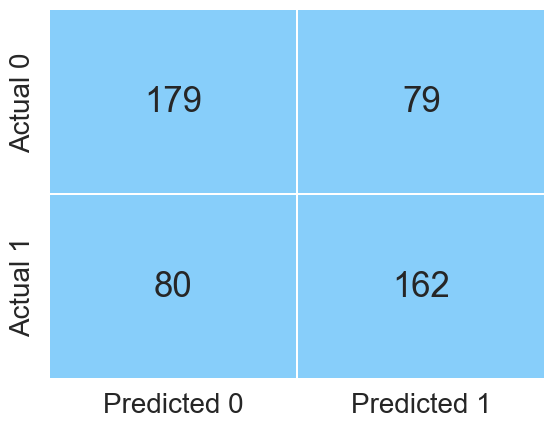

In [70]:
plot_confusion_matrix(decision_tree_model)

In [71]:
test_report = get_test_report(decision_tree_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       258
           1       0.67      0.67      0.67       242

    accuracy                           0.68       500
   macro avg       0.68      0.68      0.68       500
weighted avg       0.68      0.68      0.68       500



In [72]:
kappa_value = kappa_score(decision_tree_model)

# print the kappa value
print(kappa_value)

0.3632664829884026


In [73]:
F1_score = metrics.f1_score(y_pred, y_test)
print(F1_score)

0.6708074534161491


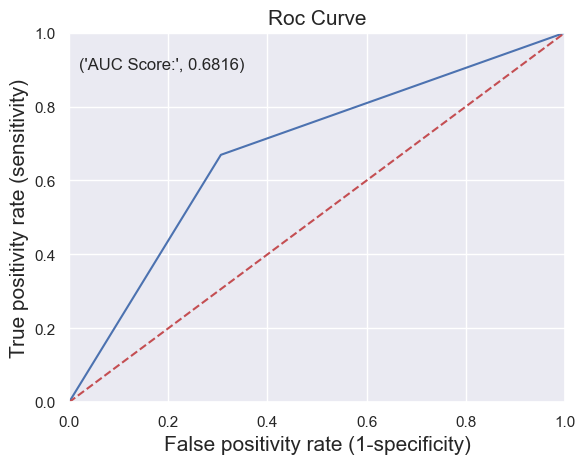

In [74]:
plot_roc(decision_tree_model)

In [75]:
update_score_card(model_name = "Decision Tree")

Model  AUC Score  Precision Score  Recall Score  \
0        Logistic Regression   0.829361         0.793233      0.871901   
1  Logistic Regression (SGD)   0.833237         0.799242      0.871901   
2              Decision Tree   0.681610         0.672199      0.669421   

   Accuracy Score  Kappa Score  F1 Score  
0           0.828     0.656703  0.830709  
1           0.832     0.664601  0.833992  
2           0.682     0.363266  0.670807

**Random Forest**

In [76]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=10)

random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [77]:
y_pred = random_forest.predict(X_test)

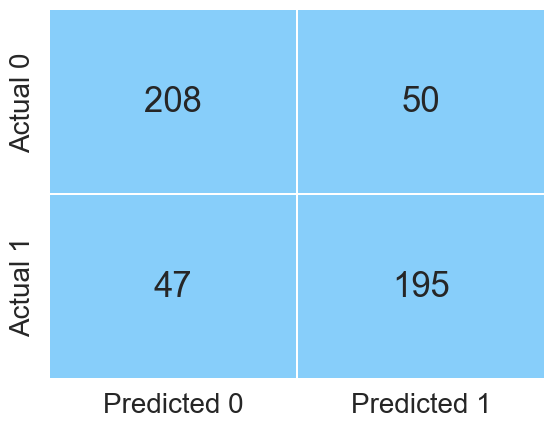

In [78]:
plot_confusion_matrix(random_forest)

In [79]:
test_report = get_test_report(random_forest)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       258
           1       0.80      0.81      0.80       242

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



In [80]:
kappa_value = kappa_score(random_forest)

# print the kappa value
print(kappa_value)

0.611751520973423


In [81]:
F1_score = metrics.f1_score(y_pred, y_test)
print(F1_score)

0.8008213552361396


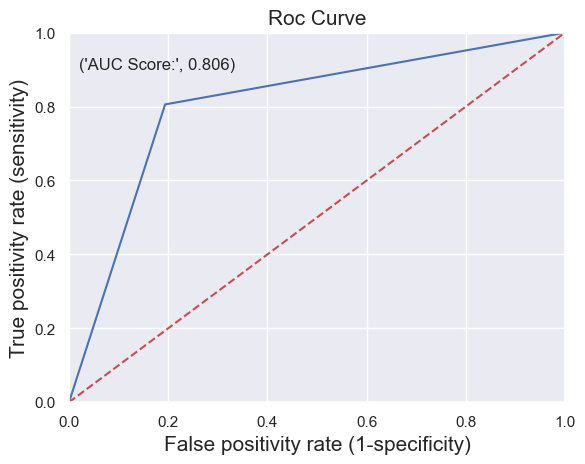

In [82]:
plot_roc(random_forest)

In [83]:
update_score_card(model_name = "Random Forest")

Model  AUC Score  Precision Score  Recall Score  \
0        Logistic Regression   0.829361         0.793233      0.871901   
1  Logistic Regression (SGD)   0.833237         0.799242      0.871901   
2              Decision Tree   0.681610         0.672199      0.669421   
3              Random Forest   0.805993         0.795918      0.805785   

   Accuracy Score  Kappa Score  F1 Score  
0           0.828     0.656703  0.830709  
1           0.832     0.664601  0.833992  
2           0.682     0.363266  0.670807  
3           0.806     0.611752  0.800821

**Support Vector Machine**

In [84]:
svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

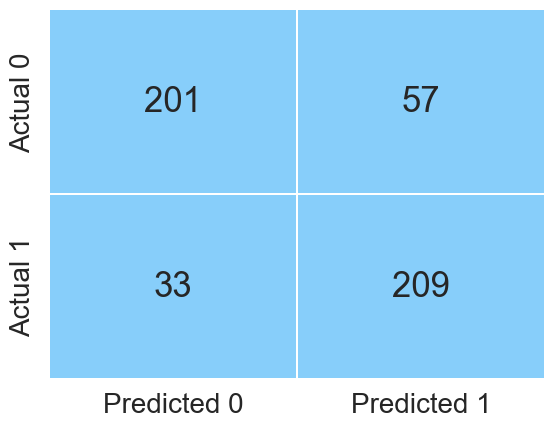

In [85]:
plot_confusion_matrix(svm_classifier)

In [86]:
test_report = get_test_report(svm_classifier)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       258
           1       0.79      0.86      0.82       242

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



In [87]:
kappa_value = kappa_score(svm_classifier)

# print the kappa value
print(kappa_value)

0.6407357731366162


In [88]:
F1_score = metrics.f1_score(y_pred, y_test)
print(F1_score)

0.8228346456692913


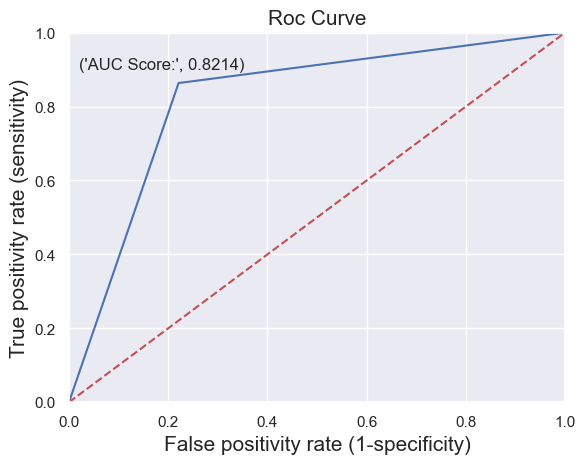

In [89]:
plot_roc(svm_classifier)

In [90]:
update_score_card(model_name = "SVM")

Model  AUC Score  Precision Score  Recall Score  \
0        Logistic Regression   0.829361         0.793233      0.871901   
1  Logistic Regression (SGD)   0.833237         0.799242      0.871901   
2              Decision Tree   0.681610         0.672199      0.669421   
3              Random Forest   0.805993         0.795918      0.805785   
4                        SVM   0.821353         0.785714      0.863636   

   Accuracy Score  Kappa Score  F1 Score  
0           0.828     0.656703  0.830709  
1           0.832     0.664601  0.833992  
2           0.682     0.363266  0.670807  
3           0.806     0.611752  0.800821  
4           0.820     0.640736  0.822835

**Naive Bayes (MULTINOMIAL NB)**

In [91]:
nb_classifier = MultinomialNB()

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

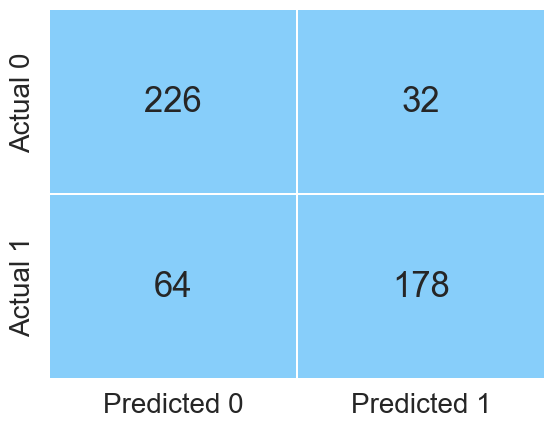

In [92]:
plot_confusion_matrix(nb_classifier)

In [93]:
test_report = get_test_report(nb_classifier)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.78      0.88      0.82       258
           1       0.85      0.74      0.79       242

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



In [94]:
kappa_value = kappa_score(nb_classifier)

# print the kappa value
print(kappa_value)

0.6140238018655517


In [95]:
F1_score = metrics.f1_score(y_pred, y_test)
print(F1_score)

0.7876106194690266


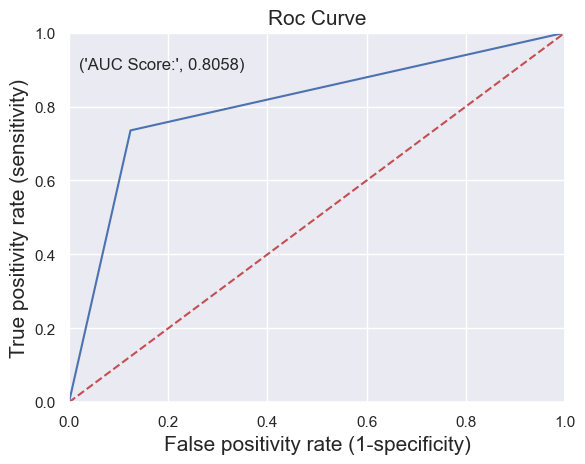

In [96]:
plot_roc(nb_classifier)

In [97]:
update_score_card(model_name = "MultiNomial NB")

Model  AUC Score  Precision Score  Recall Score  \
0        Logistic Regression   0.829361         0.793233      0.871901   
1  Logistic Regression (SGD)   0.833237         0.799242      0.871901   
2              Decision Tree   0.681610         0.672199      0.669421   
3              Random Forest   0.805993         0.795918      0.805785   
4                        SVM   0.821353         0.785714      0.863636   
5             MultiNomial NB   0.805753         0.847619      0.735537   

   Accuracy Score  Kappa Score  F1 Score  
0           0.828     0.656703  0.830709  
1           0.832     0.664601  0.833992  
2           0.682     0.363266  0.670807  
3           0.806     0.611752  0.800821  
4           0.820     0.640736  0.822835  
5           0.808     0.614024  0.787611

**Naive Bayes (BERNOULLI NB)**

In [98]:
nb_classifier = BernoulliNB()

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

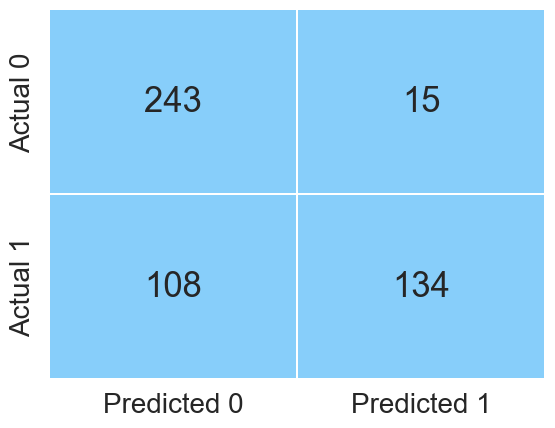

In [99]:
plot_confusion_matrix(nb_classifier)

In [100]:
test_report = get_test_report(nb_classifier)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.69      0.94      0.80       258
           1       0.90      0.55      0.69       242

    accuracy                           0.75       500
   macro avg       0.80      0.75      0.74       500
weighted avg       0.79      0.75      0.74       500



In [101]:
kappa_value = kappa_score(nb_classifier)

# print the kappa value
print(kappa_value)

0.5015561174868701


In [102]:
F1_score = metrics.f1_score(y_pred, y_test)
print(F1_score)

0.6854219948849105


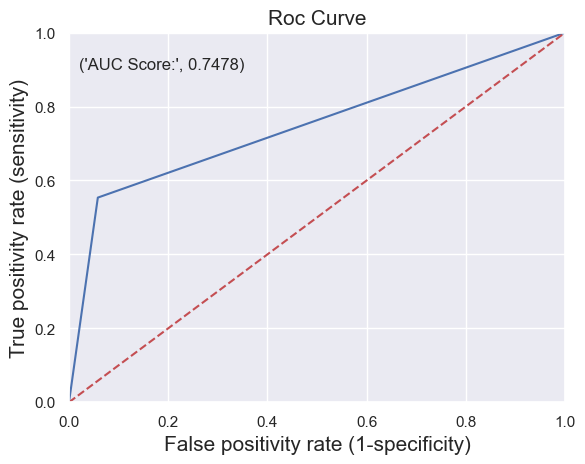

In [103]:
plot_roc(nb_classifier)

In [104]:
update_score_card(model_name = "Bernoulli NB")

Model  AUC Score  Precision Score  Recall Score  \
0        Logistic Regression   0.829361         0.793233      0.871901   
1  Logistic Regression (SGD)   0.833237         0.799242      0.871901   
2              Decision Tree   0.681610         0.672199      0.669421   
3              Random Forest   0.805993         0.795918      0.805785   
4                        SVM   0.821353         0.785714      0.863636   
5             MultiNomial NB   0.805753         0.847619      0.735537   
6               Bernoulli NB   0.747790         0.899329      0.553719   

   Accuracy Score  Kappa Score  F1 Score  
0           0.828     0.656703  0.830709  
1           0.832     0.664601  0.833992  
2           0.682     0.363266  0.670807  
3           0.806     0.611752  0.800821  
4           0.820     0.640736  0.822835  
5           0.808     0.614024  0.787611  
6           0.754     0.501556  0.685422

**Neural Networks**

In [105]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)

y_pred = (model.predict(X_test) > 0.5).astype("int32")

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.5153 - loss: 0.6913 - val_accuracy: 0.8250 - val_loss: 0.6683
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - accuracy: 0.8810 - loss: 0.6158 - val_accuracy: 0.8125 - val_loss: 0.5179
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - accuracy: 0.9621 - loss: 0.3121 - val_accuracy: 0.8300 - val_loss: 0.3873
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - accuracy: 0.9893 - loss: 0.0894 - val_accuracy: 0.8300 - val_loss: 0.3701
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - accuracy: 0.9963 - loss: 0.0364 - val_accuracy: 0.8275 - val_loss: 0.3764
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8179 - loss: 0.4196
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


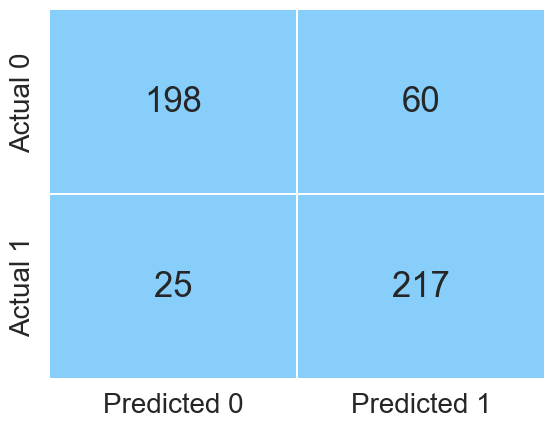

In [106]:
plot_confusion_matrix(model)

In [107]:
test_report = get_test_report(model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.89      0.77      0.82       258
           1       0.78      0.90      0.84       242

    accuracy                           0.83       500
   macro avg       0.84      0.83      0.83       500
weighted avg       0.84      0.83      0.83       500



In [108]:
kappa_value = kappa_score(model)

# print the kappa value
print(kappa_value)

0.6611709930480261


In [109]:
F1_score = metrics.f1_score(y_pred, y_test)
print(F1_score)

0.8362235067437379


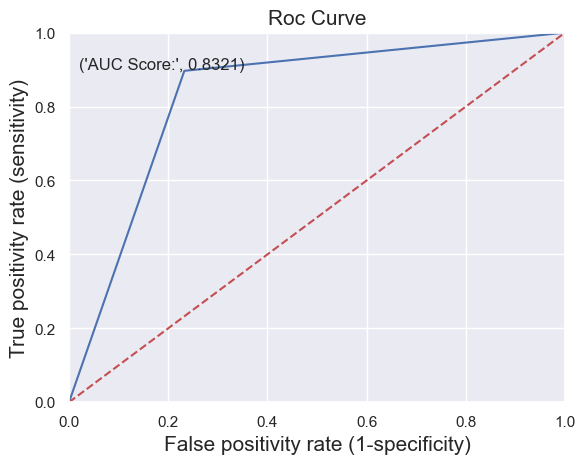

In [110]:
plot_roc(model)

In [111]:
update_score_card(model_name = "Neural Networks")

Model  AUC Score  Precision Score  Recall Score  \
0        Logistic Regression   0.829361         0.793233      0.871901   
1  Logistic Regression (SGD)   0.833237         0.799242      0.871901   
2              Decision Tree   0.681610         0.672199      0.669421   
3              Random Forest   0.805993         0.795918      0.805785   
4                        SVM   0.821353         0.785714      0.863636   
5             MultiNomial NB   0.805753         0.847619      0.735537   
6               Bernoulli NB   0.747790         0.899329      0.553719   
7            Neural Networks   0.832068         0.783394      0.896694   

   Accuracy Score  Kappa Score  F1 Score  
0           0.828     0.656703  0.830709  
1           0.832     0.664601  0.833992  
2           0.682     0.363266  0.670807  
3           0.806     0.611752  0.800821  
4           0.820     0.640736  0.822835  
5           0.808     0.614024  0.787611  
6           0.754     0.501556  0.685422  
7           0.830     0.661171  0.836224

**From the above we can conclude that neural networks accuracy is better model.**

# **Testing With Good Model**

In [112]:
new_sentences = ["The day was worse and i enjoyed"]

new_sentences_tfidf = tfidf_vectorizer.transform(new_sentences)

predictions = (model.predict(new_sentences_tfidf) > 0.5).astype("int32")

for sentence, prediction in zip(new_sentences, predictions):
    if prediction == 1:
        print(f"'{sentence}' is predicted as positive.")
    else:
        print(f"'{sentence}' is predicted as negative.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
'The day was worse and i enjoyed' is predicted as positive.
